In [100]:
# make the necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
idx = pd.IndexSlice
import statsmodels.api as sm

from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
from sklearn.model_selection import train_test_split

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Identification of Cointegrated Pairs of Stocks

In [101]:
prices = pd.read_csv('auto.csv', index_col=['date'])
prices.head(10)

MARUTI.NS  TATAMOTORS.NS      M&M.NS  BAJAJ-AUTO.NS  \
date                                                                
01-01-2018  9651.900391     424.450012  744.650024    3289.250000   
02-01-2018  9554.049805     439.299988  752.900024    3294.750000   
03-01-2018  9416.599609     433.899994  754.900024    3241.050049   
04-01-2018  9386.250000     429.950012  756.000000    3264.449951   
05-01-2018  9433.849609     431.600006  756.349976    3279.850098   
08-01-2018  9448.950195     433.549988  759.900024    3275.750000   
09-01-2018  9383.549805     437.549988  762.450012    3243.500000   
10-01-2018  9375.849609     433.299988  759.849976    3207.399902   
11-01-2018  9339.799805     434.750000  766.650024    3193.399902   
12-01-2018  9459.150391     437.100006  767.500000    3175.350098   

            EICHERMOT.NS  HEROMOTOCO.NS  BALKRISIND.NS  BHARATFORG.NS  \
date                                                                    
01-01-2018   2989.314941    3749.100098    1195.449951     723.000000   
02-01-2018   2867.014893    3743.850098    1173.250000     728.049988   
03-01-2018   2881.435059    3755.199951    1189.050049     733.099976   
04-01-2018   2857.074951    3738.899902    1205.300049     726.950012   
05-01-2018   2923.699951    3744.649902    1210.699951     738.849976   
08-01-2018   2919.739990    3786.750000    1202.800049     742.400024   
09-01-2018   2859.695068    3749.449951    1176.550049     732.599976   
10-01-2018   2809.750000    3736.899902    1166.449951     726.549988   
11-01-2018   2844.469971    3705.649902    1157.849976     727.450012   
12-01-2018   2864.975098    3687.350098    1158.500000     730.599976   

            ASHOKLEY.NS  TIINDIA.NS  
date                                 
01-01-2018   118.650002  269.799988  
02-01-2018   123.349998  268.149994  
03-01-2018   124.500000  273.850006  
04-01-2018   126.949997  280.600006  
05-01-2018   127.449997  294.450012  
08-01-2018   128.449997  294.700012  
09-01-2018   130.500000  295.600006  
10-01-2018   127.949997  294.100006  
11-01-2018   127.050003  287.399994  
12-01-2018   128.649994  287.350006

In [102]:
# train test split 
train_close, test_close = train_test_split(prices, test_size=0.251012, shuffle=False)

In [103]:
# quick view of head and tail of train set
train_close.head(2).append(train_close.tail(2))

MARUTI.NS  TATAMOTORS.NS      M&M.NS  BAJAJ-AUTO.NS  \
date                                                                
01-01-2018  9651.900391     424.450012  744.650024    3289.250000   
02-01-2018  9554.049805     439.299988  752.900024    3294.750000   
30-12-2020  7612.899902     184.149994  720.700012    3448.149902   
31-12-2020  7649.600098     183.850006  720.599976    3444.050049   

            EICHERMOT.NS  HEROMOTOCO.NS  BALKRISIND.NS  BHARATFORG.NS  \
date                                                                    
01-01-2018   2989.314941    3749.100098    1195.449951     723.000000   
02-01-2018   2867.014893    3743.850098    1173.250000     728.049988   
30-12-2020   2517.350098    3101.399902    1615.050049     517.599976   
31-12-2020   2530.899902    3110.000000    1646.300049     525.299988   

            ASHOKLEY.NS  TIINDIA.NS  
date                                 
01-01-2018   118.650002  269.799988  
02-01-2018   123.349998  268.149994  
30-12-2020    94.800003  793.299988  
31-12-2020    95.449997  800.849976

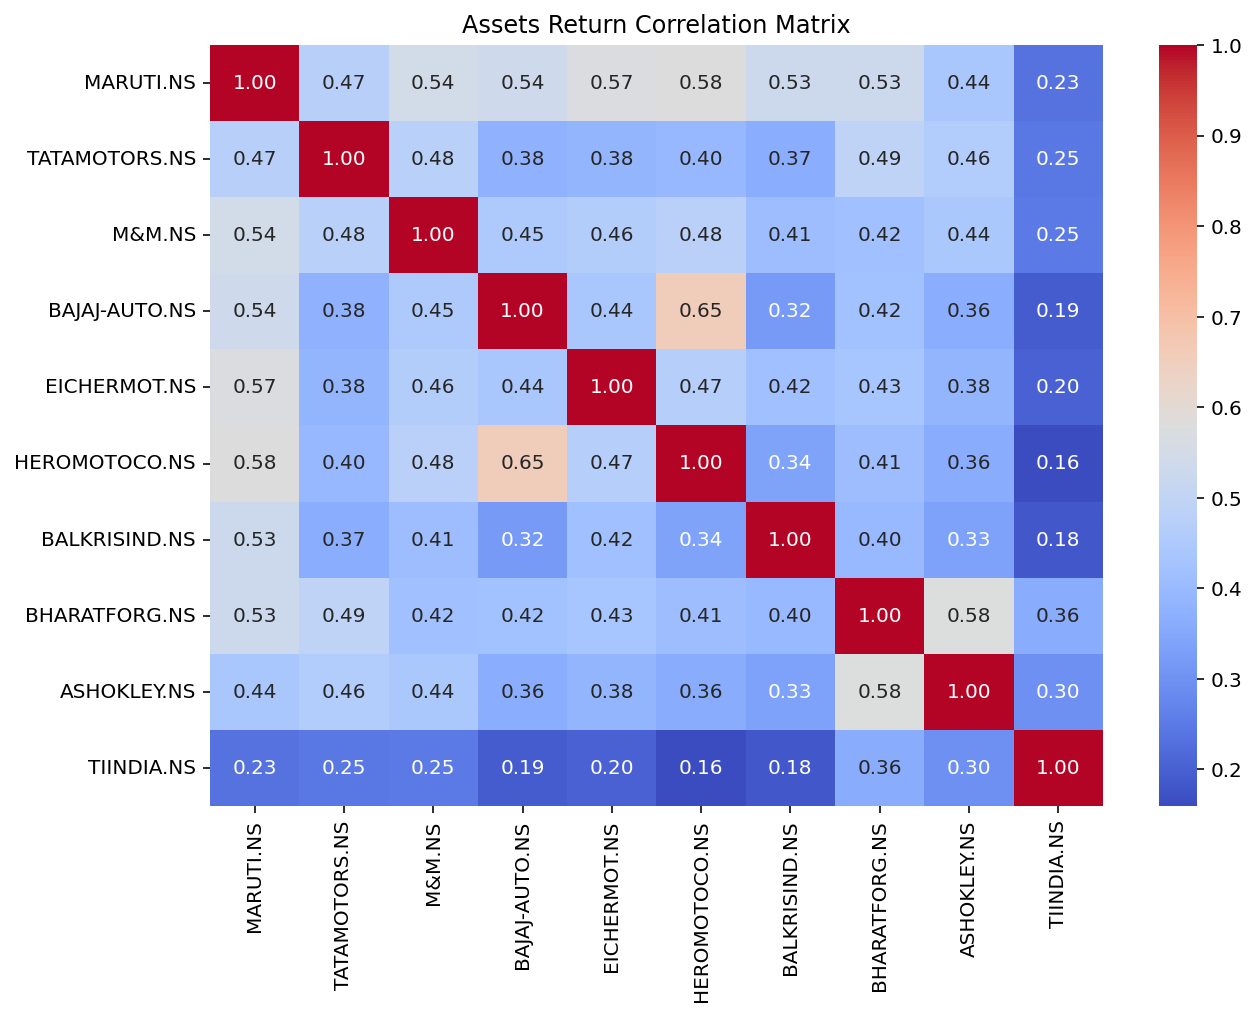

In [104]:
# Pearson correlation
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(train_close.pct_change().corr(method ='pearson'), ax=ax, cmap='coolwarm', annot=True, fmt=".2f") #spearman
ax.set_title('Assets Return Correlation Matrix')
plt.savefig('chart1', dpi=400)

In [105]:
# function to find cointegrated pairs
def find_cointegrated_pairs(data):
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]])
            pvalue_matrix[i, j] = result[1]
            if result[1] < 0.05:
                pairs.append((keys[i], keys[j]))
    return pvalue_matrix, pairs

[('MARUTI.NS', 'EICHERMOT.NS'), ('MARUTI.NS', 'BHARATFORG.NS'), ('MARUTI.NS', 'ASHOKLEY.NS'), ('TATAMOTORS.NS', 'M&M.NS'), ('TATAMOTORS.NS', 'BHARATFORG.NS'), ('TATAMOTORS.NS', 'ASHOKLEY.NS'), ('EICHERMOT.NS', 'HEROMOTOCO.NS'), ('EICHERMOT.NS', 'BHARATFORG.NS'), ('EICHERMOT.NS', 'ASHOKLEY.NS'), ('BHARATFORG.NS', 'ASHOKLEY.NS')]


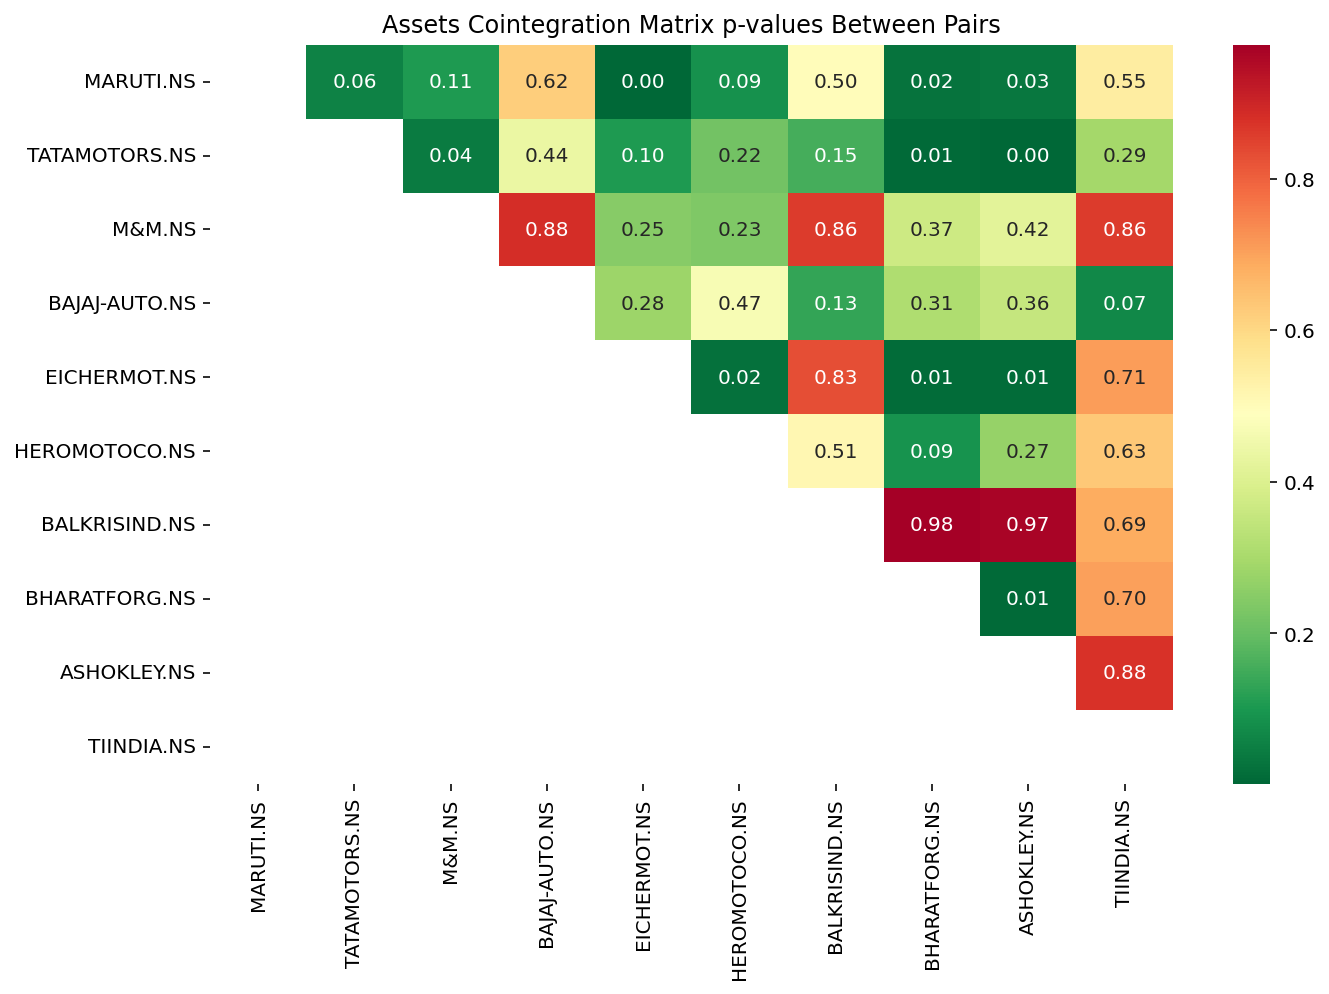

In [106]:
# calculate p-values and plot as a heatmap
pvalues, pairs = find_cointegrated_pairs(train_close)
print(pairs)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(pvalues, xticklabels = train_close.columns,
                yticklabels = train_close.columns, cmap = 'RdYlGn_r', annot = True, fmt=".2f",
                mask = (pvalues >= 0.99))
ax.set_title('Assets Cointegration Matrix p-values Between Pairs')
plt.tight_layout()
plt.savefig('chart2', dpi=400) 

### Perform a Cointegration test for the Selected Pair

In [107]:
# final pair to test strategy
asset1 = 'BHARATFORG.NS'
asset2 = 'ASHOKLEY.NS'

In [108]:
# create a train dataframe of 2 assets
train = pd.DataFrame()
train['asset1'] = train_close[asset1]
train['asset2'] = train_close[asset2]

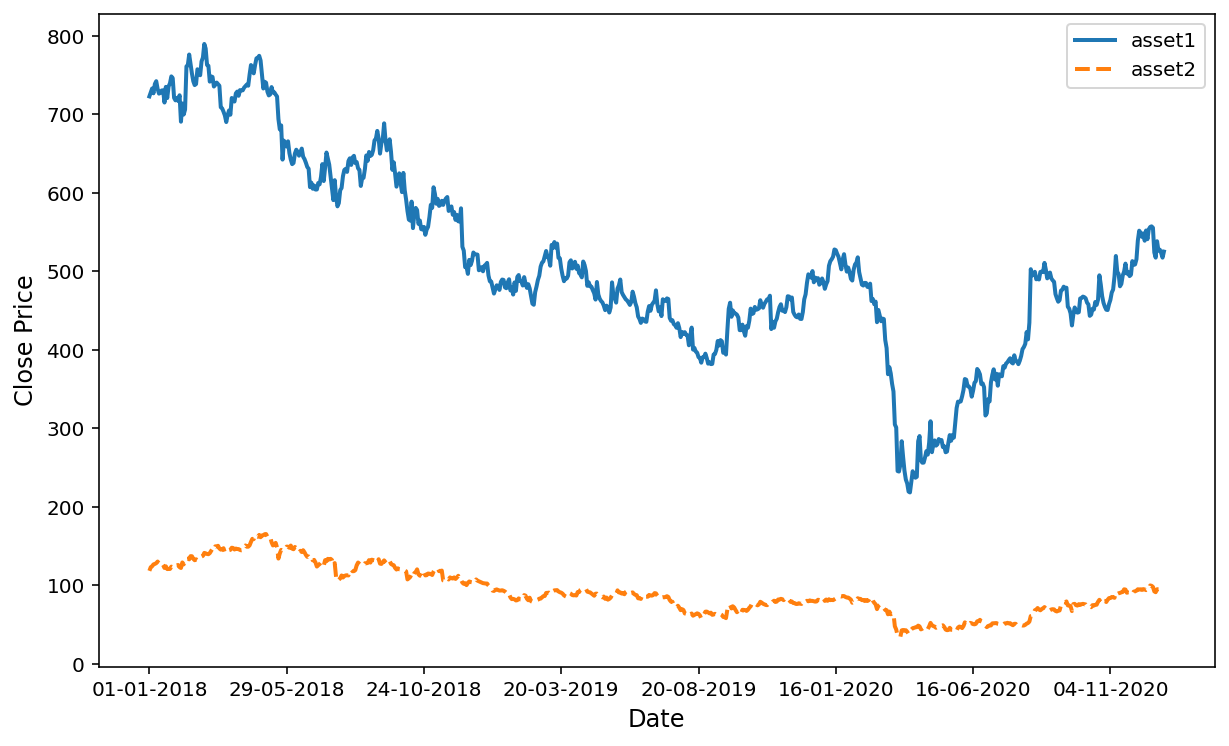

In [110]:
from matplotlib.dates import DateFormatter
# visualize closing prices
ax = train[['asset1']].plot(figsize=(10, 6), linewidth=2,linestyle='solid', label = "asset1")
plt.plot(train[['asset2']], linewidth=2, linestyle='dashed', label = "asset2")
ax.set_ylabel("Close Price", fontsize=12)
ax.set_xlabel("Date", fontsize=12)
plt.legend()
#date_form = DateFormatter("%Y")
# ax.xaxis.set_major_formatter(date_form)
#ax.grid(True);
plt.savefig('chart3', dpi=500) 

In [12]:
# run OLS regression
model=sm.OLS(train.asset2, train.asset1).fit()

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 asset2   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          5.432e+04
Date:                Thu, 12 May 2022   Prob (F-statistic):                        0.00
Time:                        10:19:06   Log-Likelihood:                         -2844.5
No. Observations:                 740   AIC:                                      5691.
Df Residuals:                     739   BIC:                                      5696.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
asset1         0.1839      0.001    233.067      0.000       0.182       0.185
==============================================================================
Omnibus:                       29.454   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.935
Skew:                           0.501   Prob(JB):                     1.16e-07
Kurtosis:                       3.180   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

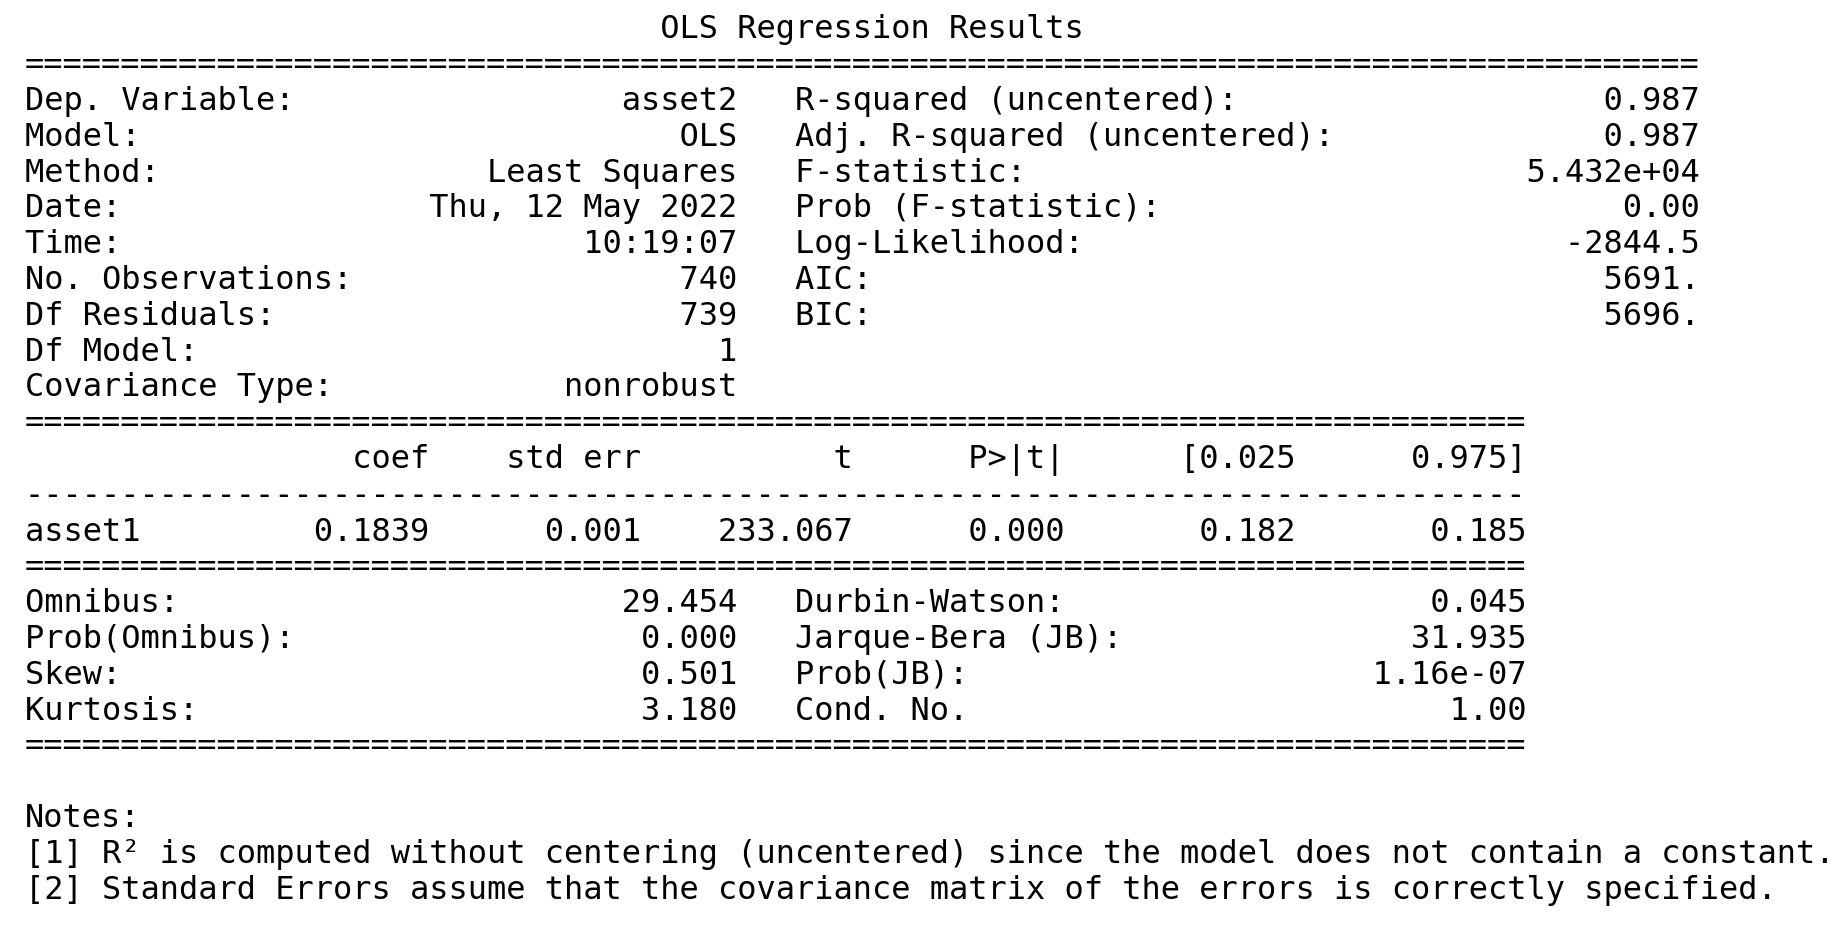

In [14]:
# print regression summary results
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 16}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.8, top=0.7, bottom=0.1)
#plt.savefig('chart4', dpi=500);

In [15]:
model.params[0]

0.18389103259282577

In [16]:
print('Hedge Ratio = ', model.params[0])

Hedge Ratio =  0.18389103259282577


In [17]:
# calculate residual
residual = train.asset2 - model.params[0] * train.asset1 # residual of the OLS model

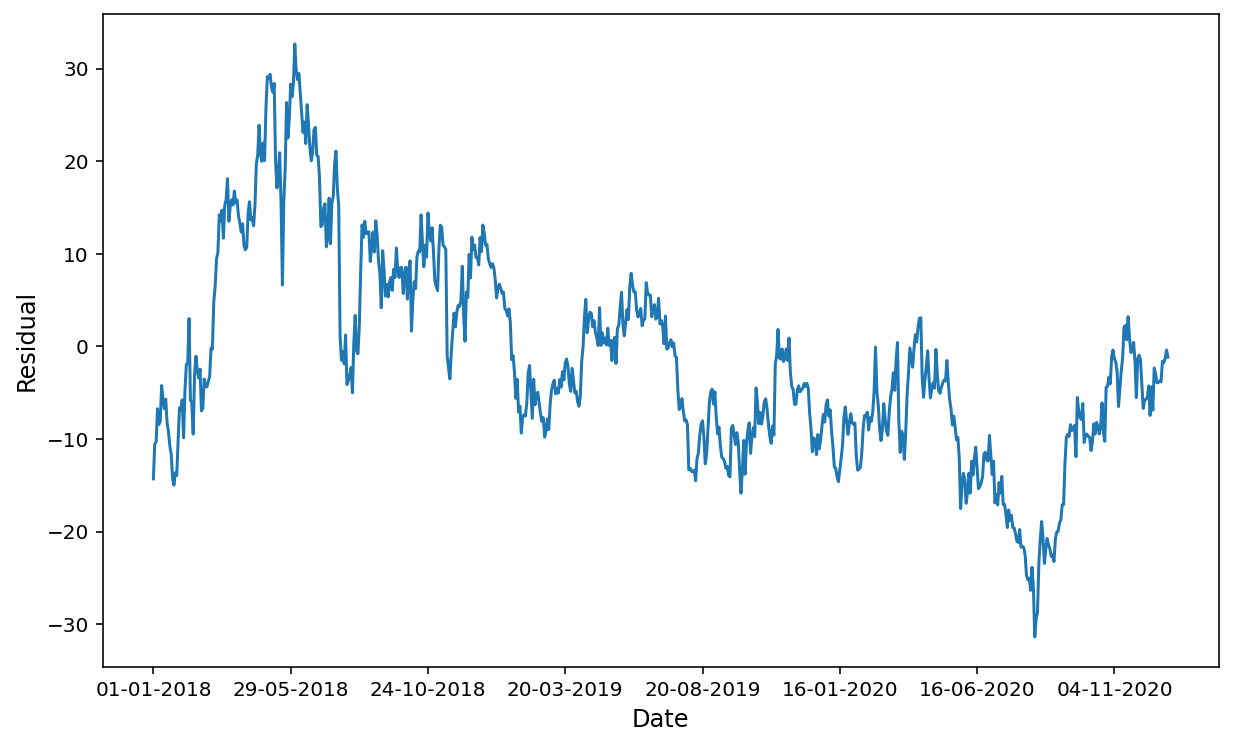

In [111]:
# Plot the residual
ax = residual.plot(figsize=(10, 6))
ax.set_ylabel("Residual", fontsize=12)
ax.set_xlabel("Date", fontsize=12)
# ax.grid(True);
plt.savefig('chart5', dpi=500);

In [112]:
# conduct Augmented Dickey-Fuller test
adf = adfuller(residual, maxlag = 1)
adf

(-2.739715154602991,
 0.06741431712216484,
 1,
 738,
 {'1%': -3.4392418578608983,
  '5%': -2.86546426916434,
  '10%': -2.568859710342903},
 3371.2010107450337)

In [113]:
print('Test Statistic = ', adf[0])

Test Statistic =  -2.739715154602991


In [114]:
# probablity critical values
print(adf[4])

{'1%': -3.4392418578608983, '5%': -2.86546426916434, '10%': -2.568859710342903}


### Generate Trading Signals using z-scores of the spread

In [115]:
# calculate z-score
def zscore(series):
    return (series - series.mean()) / np.std(series)

In [116]:
# create a dataframe for trading signals
signals = pd.DataFrame()
signals['asset1'] = test_close[asset1] 
signals['asset2'] = test_close[asset2]
ratios = signals.asset1 / signals.asset2

In [117]:
signals.head()

asset1      asset2
date                              
01-01-2021  538.099976   99.099998
04-01-2021  552.599976  104.050003
05-01-2021  556.549988  104.750000
06-01-2021  548.299988  105.099998
07-01-2021  598.849976  111.050003

In [118]:
# calculate z-score and define upper and lower thresholds
signals['z'] = zscore(ratios)
signals['z upper limit'] = np.mean(signals['z']) + np.std(signals['z'])
signals['z lower limit'] = np.mean(signals['z']) - np.std(signals['z'])

In [119]:
signals.head()

asset1      asset2         z  z upper limit  z lower limit
date                                                                      
01-01-2021  538.099976   99.099998 -0.341340            1.0           -1.0
04-01-2021  552.599976  104.050003 -0.589503            1.0           -1.0
05-01-2021  556.549988  104.750000 -0.584875            1.0           -1.0
06-01-2021  548.299988  105.099998 -0.785536            1.0           -1.0
07-01-2021  598.849976  111.050003 -0.419054            1.0           -1.0

In [120]:
# create signal - short if z-score is greater than upper limit else long
signals['signals1'] = 0
signals['signals1'] = np.select([signals['z'] > \
                                 signals['z upper limit'], signals['z'] < signals['z lower limit']], [-1, 1], default=0)

In [121]:
# we take the first order difference to obtain portfolio position for stock
signals['positions1'] = signals['signals1'].diff()
signals['signals2'] = -signals['signals1']
signals['positions2'] = signals['signals2'].diff()

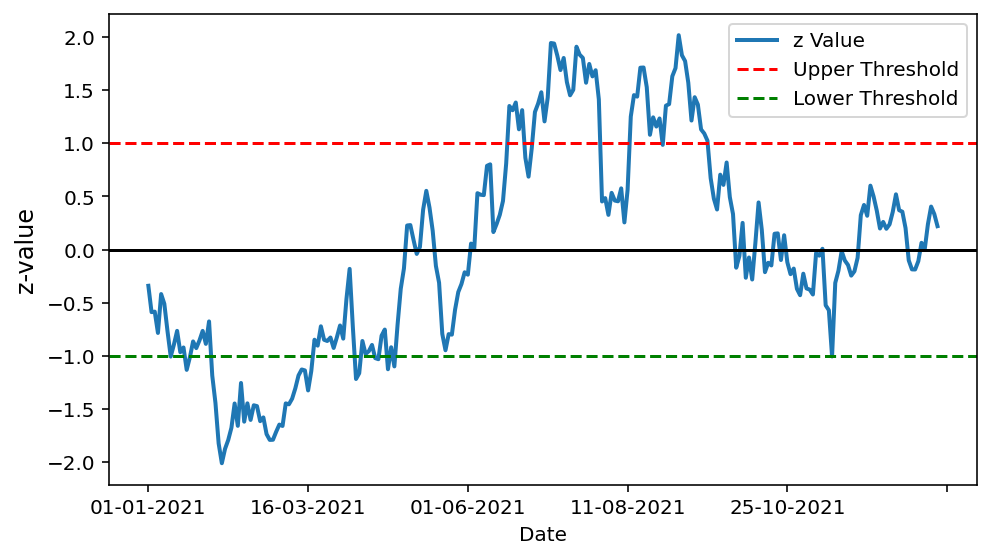

In [126]:
# # visualize z-score and upper and lower thresholds   
signals['z'].plot(label="z Value", figsize=(7, 4), linewidth=2)
#plt.title("Z-score Evaluation")
plt.ylabel("z-value", fontsize=12)
plt.xlabel("Date")
plt.axhline(signals['z'].mean(),linestyle= 'solid', color="black")
plt.axhline(signals['z upper limit'].mean(), linestyle= 'dashed',color="red", label="Upper Threshold")
plt.axhline(signals['z lower limit'].mean(), linestyle = 'dashed', color="green", label="Lower Threshold")
plt.legend()
plt.tight_layout()
plt.savefig('chart6', dpi=500);

In [127]:
# verify dataframe head and tail
signals.head(3).append(signals.tail(3))

asset1      asset2         z  z upper limit  z lower limit  \
date                                                                         
01-01-2021  538.099976   99.099998 -0.341340            1.0           -1.0   
04-01-2021  552.599976  104.050003 -0.589503            1.0           -1.0   
05-01-2021  556.549988  104.750000 -0.584875            1.0           -1.0   
29-12-2021  701.750000  121.250000  0.404978            1.0           -1.0   
30-12-2021  693.900024  120.599998  0.334266            1.0           -1.0   
31-12-2021  697.849976  122.449997  0.220218            1.0           -1.0   

            signals1  positions1  signals2  positions2  
date                                                    
01-01-2021         0         NaN         0         NaN  
04-01-2021         0         0.0         0         0.0  
05-01-2021         0         0.0         0         0.0  
29-12-2021         0         0.0         0         0.0  
30-12-2021         0         0.0         0         0.0  
31-12-2021         0         0.0         0         0.0

In [128]:
# # check portfolio position
signals[signals.signals1 != 0].head(10)

asset1      asset2         z  z upper limit  z lower limit  \
date                                                                         
12-01-2021  621.400024  121.599998 -1.008202            1.0           -1.0   
19-01-2021  599.200012  118.650002 -1.133472            1.0           -1.0   
20-01-2021  621.549988  121.699997 -1.014391            1.0           -1.0   
01-02-2021  613.250000  122.050003 -1.186808            1.0           -1.0   
02-02-2021  648.400024  132.300003 -1.444642            1.0           -1.0   
03-02-2021  634.349976  134.449997 -1.826129            1.0           -1.0   
04-02-2021  629.049988  135.899994 -2.012499            1.0           -1.0   
05-02-2021  617.900024  131.649994 -1.877457            1.0           -1.0   
08-02-2021  643.049988  135.850006 -1.793965            1.0           -1.0   
09-02-2021  645.299988  134.750000 -1.678523            1.0           -1.0   

            signals1  positions1  signals2  positions2  
date                                                    
12-01-2021         1         1.0        -1        -1.0  
19-01-2021         1         1.0        -1        -1.0  
20-01-2021         1         0.0        -1         0.0  
01-02-2021         1         1.0        -1        -1.0  
02-02-2021         1         0.0        -1         0.0  
03-02-2021         1         0.0        -1         0.0  
04-02-2021         1         0.0        -1         0.0  
05-02-2021         1         0.0        -1         0.0  
08-02-2021         1         0.0        -1         0.0  
09-02-2021         1         0.0        -1         0.0

In [129]:
signals[signals.positions1 != 0].head().append(signals[signals.positions1 != 0].tail())

asset1      asset2         z  z upper limit  z lower limit  \
date                                                                         
01-01-2021  538.099976   99.099998 -0.341340            1.0           -1.0   
12-01-2021  621.400024  121.599998 -1.008202            1.0           -1.0   
13-01-2021  628.250000  121.650002 -0.895119            1.0           -1.0   
19-01-2021  599.200012  118.650002 -1.133472            1.0           -1.0   
21-01-2021  618.849976  119.500000 -0.865382            1.0           -1.0   
27-08-2021  729.450012  120.250000  0.985919            1.0           -1.0   
30-08-2021  759.799988  121.699997  1.355383            1.0           -1.0   
20-09-2021  740.099976  125.099998  0.672912            1.0           -1.0   
15-11-2021  777.349976  152.100006 -1.006983            1.0           -1.0   
16-11-2021  800.650024  147.100006 -0.314164            1.0           -1.0   

            signals1  positions1  signals2  positions2  
date                                                    
01-01-2021         0         NaN         0         NaN  
12-01-2021         1         1.0        -1        -1.0  
13-01-2021         0        -1.0         0         1.0  
19-01-2021         1         1.0        -1        -1.0  
21-01-2021         0        -1.0         0         1.0  
27-08-2021         0         1.0         0        -1.0  
30-08-2021        -1        -1.0         1         1.0  
20-09-2021         0         1.0         0        -1.0  
15-11-2021         1         1.0        -1        -1.0  
16-11-2021         0        -1.0         0         1.0

In [130]:
signals.loc[signals['positions1'] == 1].index
signals['asset1'][signals['positions1'] == 1].value_counts()

621.400024    1
599.200012    1
613.250000    1
614.849976    1
560.849976    1
576.549988    1
592.450012    1
741.400024    1
771.650024    1
729.450012    1
740.099976    1
777.349976    1
Name: asset1, dtype: int64

In [131]:
signals

asset1      asset2         z  z upper limit  z lower limit  \
date                                                                         
01-01-2021  538.099976   99.099998 -0.341340            1.0           -1.0   
04-01-2021  552.599976  104.050003 -0.589503            1.0           -1.0   
05-01-2021  556.549988  104.750000 -0.584875            1.0           -1.0   
06-01-2021  548.299988  105.099998 -0.785536            1.0           -1.0   
07-01-2021  598.849976  111.050003 -0.419054            1.0           -1.0   
...                ...         ...       ...            ...            ...   
27-12-2021  687.000000  122.800003  0.002016            1.0           -1.0   
28-12-2021  702.049988  123.000000  0.238289            1.0           -1.0   
29-12-2021  701.750000  121.250000  0.404978            1.0           -1.0   
30-12-2021  693.900024  120.599998  0.334266            1.0           -1.0   
31-12-2021  697.849976  122.449997  0.220218            1.0           -1.0   

            signals1  positions1  signals2  positions2  
date                                                    
01-01-2021         0         NaN         0         NaN  
04-01-2021         0         0.0         0         0.0  
05-01-2021         0         0.0         0         0.0  
06-01-2021         0         0.0         0         0.0  
07-01-2021         0         0.0         0         0.0  
...              ...         ...       ...         ...  
27-12-2021         0         0.0         0         0.0  
28-12-2021         0         0.0         0         0.0  
29-12-2021         0         0.0         0         0.0  
30-12-2021         0         0.0         0         0.0  
31-12-2021         0         0.0         0         0.0  

[248 rows x 9 columns]

In [132]:
signals = signals.reset_index()

In [136]:
# visualize trading signals and position
fig=plt.figure(figsize=(12,5))
bx = fig.add_subplot(111)   
bx2 = bx.twinx()

#plot two different assets
l1, = bx.plot(signals['asset1'], c='#4abdac', linestyle = 'solid', linewidth=2)
l2, = bx2.plot(signals['asset2'], c='#907163', linestyle = 'dashed', linewidth=2)

u1, = bx.plot(signals['asset1'][signals['positions1'] == 1], lw=0, 
              marker='^', markersize=8, c='g',alpha=0.7)

d1, = bx.plot(signals['asset1'][signals['positions1'] == -1], lw=0,
              marker='v',markersize=8, c='r',alpha=0.7)

u2, = bx2.plot(signals['asset2'][signals['positions2'] == 1], lw=0,
               marker='2',markersize=8, c='g',alpha=0.9, markeredgewidth=3)

d2, = bx2.plot(signals['asset2'][signals['positions2'] == -1], lw=0,
               marker='1',markersize=8, c='r',alpha=0.9,markeredgewidth=3)
bx.set_ylabel(asset1,fontsize=12)
bx2.set_ylabel(asset2, rotation=270, fontsize=12)
bx.yaxis.labelpad=20
bx2.yaxis.labelpad=20
bx.set_xlabel('date')
# bx.xaxis.set_major_formatter(DateFormatter("%Y"))
# bx2.xaxis.set_major_formatter(DateFormatter("%Y"))
bx.xaxis.labelpad=15

plt.legend([l1,l2,u1,d1,u2,d2], [asset1, asset2,'LONG {}'.format(asset1),
           'SHORT {}'.format(asset1),
           'LONG {}'.format(asset2),
           'SHORT {}'.format(asset2)], loc ='best', fontsize = 11)

#plt.title('Pair Trading - Trading Signals and Position')
plt.xlabel('Date', fontsize=12)
#plt.grid(True)
plt.tight_layout()
plt.savefig('chart7', dpi=500);

### Portfolio Profit and Loss Calculation

In [83]:
initial_capital = 100000

# shares to buy for each position
positions1 = initial_capital// max(signals['asset1'])
positions2 = initial_capital// max(signals['asset2'])

In [84]:
# since there are two assets, we calculate each asset profit/loss separately 
# and in the end we aggregate them into one portfolio
portfolio = pd.DataFrame()
portfolio['asset1'] = signals['asset1']
portfolio['holdings1'] = signals['positions1'].cumsum() * signals['asset1'] * positions1
portfolio['cash1'] = initial_capital - (signals['positions1'] * signals['asset1'] * positions1).cumsum()
portfolio['total asset1'] = portfolio['holdings1'] + portfolio['cash1']
portfolio['return1'] = portfolio['total asset1'].pct_change()
portfolio['positions1'] = signals['positions1']

In [85]:
portfolio.head().append(portfolio.tail())

asset1  holdings1          cash1   total asset1  return1  positions1
0    538.099976        NaN            NaN            NaN      NaN         NaN
1    552.599976        0.0  100000.000000  100000.000000      NaN         0.0
2    556.549988        0.0  100000.000000  100000.000000      0.0         0.0
3    548.299988        0.0  100000.000000  100000.000000      0.0         0.0
4    598.849976        0.0  100000.000000  100000.000000      0.0         0.0
243  687.000000        0.0  116939.647096  116939.647096      0.0         0.0
244  702.049988        0.0  116939.647096  116939.647096      0.0         0.0
245  701.750000        0.0  116939.647096  116939.647096      0.0         0.0
246  693.900024        0.0  116939.647096  116939.647096      0.0         0.0
247  697.849976        0.0  116939.647096  116939.647096      0.0         0.0

In [86]:
portfolio[portfolio.positions1 != 0].head()

asset1     holdings1          cash1   total asset1   return1  \
0   538.099976           NaN            NaN            NaN       NaN   
7   621.400024  73946.602904   26053.397096  100000.000000  0.000000   
8   628.250000      0.000000  100815.147096  100815.147096  0.008151   
12  599.200012  71304.801452   29510.345645  100815.147096  0.000000   
14  618.849976      0.000000  103153.492741  103153.492741 -0.003105   

    positions1  
0          NaN  
7          1.0  
8         -1.0  
12         1.0  
14        -1.0

In [87]:
# pnl for the 2nd asset
portfolio['asset2'] = signals['asset2']
portfolio['holdings2'] = signals['positions2'].cumsum() * signals['asset2'] * positions2
portfolio['cash2'] = initial_capital - (signals['positions2'] * signals['asset2'] * positions2).cumsum()
portfolio['total asset2'] = portfolio['holdings2'] + portfolio['cash2']
portfolio['return2'] = portfolio['total asset2'].pct_change()
portfolio['positions2'] = signals['positions2']

In [88]:
portfolio.to_csv('portfolio.csv')
portfolio.head().append(portfolio.tail())

asset1  holdings1          cash1   total asset1  return1  positions1  \
0    538.099976        NaN            NaN            NaN      NaN         NaN   
1    552.599976        0.0  100000.000000  100000.000000      NaN         0.0   
2    556.549988        0.0  100000.000000  100000.000000      0.0         0.0   
3    548.299988        0.0  100000.000000  100000.000000      0.0         0.0   
4    598.849976        0.0  100000.000000  100000.000000      0.0         0.0   
243  687.000000        0.0  116939.647096  116939.647096      0.0         0.0   
244  702.049988        0.0  116939.647096  116939.647096      0.0         0.0   
245  701.750000        0.0  116939.647096  116939.647096      0.0         0.0   
246  693.900024        0.0  116939.647096  116939.647096      0.0         0.0   
247  697.849976        0.0  116939.647096  116939.647096      0.0         0.0   

         asset2  holdings2         cash2  total asset2  return2  positions2  
0     99.099998        NaN           NaN           NaN      NaN         NaN  
1    104.050003        0.0  100000.00000  100000.00000      NaN         0.0  
2    104.750000        0.0  100000.00000  100000.00000      0.0         0.0  
3    105.099998        0.0  100000.00000  100000.00000      0.0         0.0  
4    111.050003        0.0  100000.00000  100000.00000      0.0         0.0  
243  122.800003        0.0  118330.30611  118330.30611      0.0         0.0  
244  123.000000        0.0  118330.30611  118330.30611      0.0         0.0  
245  121.250000        0.0  118330.30611  118330.30611      0.0         0.0  
246  120.599998        0.0  118330.30611  118330.30611      0.0         0.0  
247  122.449997        0.0  118330.30611  118330.30611      0.0         0.0

In [89]:
portfolio[portfolio.positions2 != 0].head()

asset1     holdings1          cash1   total asset1   return1  \
0   538.099976           NaN            NaN            NaN       NaN   
7   621.400024  73946.602904   26053.397096  100000.000000  0.000000   
8   628.250000      0.000000  100815.147096  100815.147096  0.008151   
12  599.200012  71304.801452   29510.345645  100815.147096  0.000000   
14  618.849976      0.000000  103153.492741  103153.492741 -0.003105   

    positions1      asset2     holdings2          cash2   total asset2  \
0          NaN   99.099998           NaN            NaN            NaN   
7          1.0  121.599998 -79891.199015  179891.199015  100000.000000   
8         -1.0  121.650002      0.000000   99967.148029   99967.148029   
12         1.0  118.650002 -77953.050985  177920.199015   99967.148029   
14        -1.0  119.500000      0.000000   99408.699015   99408.699015   

         return2  positions2  
0            NaN         NaN  
7   2.220446e-16        -1.0  
8  -3.285197e-04         1.0  
12  2.220446e-16        -1.0  
14  1.475448e-02         1.0

In [90]:
# total pnl and z-score
portfolio['z'] = signals['z']
portfolio['total asset'] = portfolio['total asset1'] + portfolio['total asset2']
portfolio['z upper limit'] = signals['z upper limit']
portfolio['z lower limit'] = signals['z lower limit']
portfolio = portfolio.dropna()

In [96]:
# plot the asset value change of the portfolio and pnl along with z-score
fig = plt.figure(figsize=(12,5),)
ax = fig.add_subplot(111)
ax2 = ax.twinx()

l1, = ax.plot(portfolio['total asset'], c='g', linewidth = 2, linestyle='solid')
l2, = ax2.plot(portfolio['z'], c='black', alpha=0.5, linewidth = 2, 
               linestyle='dashed')

b = ax2.fill_between(portfolio.index,portfolio['z upper limit'],\
                portfolio['z lower limit'], \
                alpha=0.2,color='#ffb48f')

ax.set_ylabel('Portfolio Value', fontsize=12)
ax2.set_ylabel('Z Statistics',rotation=270, fontsize=12)
ax.yaxis.labelpad=15
ax2.yaxis.labelpad=15
ax.set_xlabel('Date', fontsize=12)
ax.xaxis.labelpad=15
#plt.title('Portfolio Performance with Profit and Loss')
plt.legend([l2,b,l1],['Z Statistics',
                      'Z Statistics +-1 Sigma',
                      'Total Portfolio Value'],loc='upper left', fontsize=12);
plt.savefig('chart8', dpi=500);

In [44]:
# calculate final portfolio value
final_portfolio = portfolio['total asset'].iloc[-1]
final_portfolio

235269.9532065

In [45]:
profit = final_portfolio - 2*initial_capital
profit

35269.95320650001

In [46]:
roi = (profit / (2*initial_capital))*100 # Overall ROI of the pair trading strategy
roi

17.634976603250006